In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('../Data/Clean-data/explored.csv',parse_dates=['Date'])
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,False,False,False,False,5,2,2010


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   Temperature   420212 non-null  float64       
 5   Fuel_Price    420212 non-null  float64       
 6   MarkDown1     420212 non-null  float64       
 7   MarkDown2     420212 non-null  float64       
 8   MarkDown3     420212 non-null  float64       
 9   MarkDown4     420212 non-null  float64       
 10  MarkDown5     420212 non-null  float64       
 11  CPI           420212 non-null  float64       
 12  Unemployment  420212 non-null  float64       
 13  IsHoliday     420212 non-null  bool          
 14  Type          420212 non-null  object        
 15  Size          420

Random Forest

In [4]:
data_cat = data.copy()
data_cat.drop(['Store', 'Dept','Date','Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'week', 'month', 'year' ], axis=1, inplace=True)
data_cat

,IsHoliday,Type,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,False,A,False,False,False,False
1,False,A,False,False,False,False
2,False,A,False,False,False,False
3,False,A,False,False,False,False
4,False,A,False,False,False,False
...,...,...,...,...,...,...
420207,False,B,False,False,False,False
420208,False,B,False,False,False,False
420209,False,B,False,False,False,False
420210,False,B,False,False,False,False


In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(data_cat)
# save the encoder
data_encoded = encoder.transform(data_cat).toarray()
cols = encoder.get_feature_names_out(['IsHoliday', 'Type', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas' ])
data_encoded = pd.DataFrame(data_encoded,  columns=cols)
data_encoded

,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Super_Bowl_False,Super_Bowl_True,Labor_Day_False,Labor_Day_True,Thanksgiving_False,Thanksgiving_True,Christmas_False,Christmas_True
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
420208,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
420209,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
420210,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
data.select_dtypes(np.number)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
0,1,1,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
1,1,2,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
2,1,3,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
3,1,4,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
4,1,5,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012
420208,45,94,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012
420209,45,95,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012
420210,45,97,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012


In [7]:
num_cols = data.select_dtypes(np.number)
num_cols

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
0,1,1,24924.50,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
1,1,2,50605.27,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
2,1,3,13740.12,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
3,1,4,39954.04,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
4,1,5,32229.38,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,2487.80,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012
420208,45,94,5203.31,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012
420209,45,95,56017.47,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012
420210,45,97,6817.48,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,118221,43,10,2012


In [8]:
date_col = data.select_dtypes(np.datetime64)
date_col

,Date
0,2010-02-05
1,2010-02-05
2,2010-02-05
3,2010-02-05
4,2010-02-05
...,...
420207,2012-10-26
420208,2012-10-26
420209,2012-10-26
420210,2012-10-26


In [9]:
concat_data = pd.concat([date_col, num_cols, data_encoded], axis=1)

In [10]:
concat_data.head()

,Date,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year,IsHoliday_False,IsHoliday_True,Type_A,Type_B,Type_C,Super_Bowl_False,Super_Bowl_True,Labor_Day_False,Labor_Day_True,Thanksgiving_False,Thanksgiving_True,Christmas_False,Christmas_True
0,2010-02-05,1,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,2,2010,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2010-02-05,1,2,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,2,2010,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2010-02-05,1,3,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,2,2010,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,2010-02-05,1,4,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,2,2010,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2010-02-05,1,5,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,2,2010,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


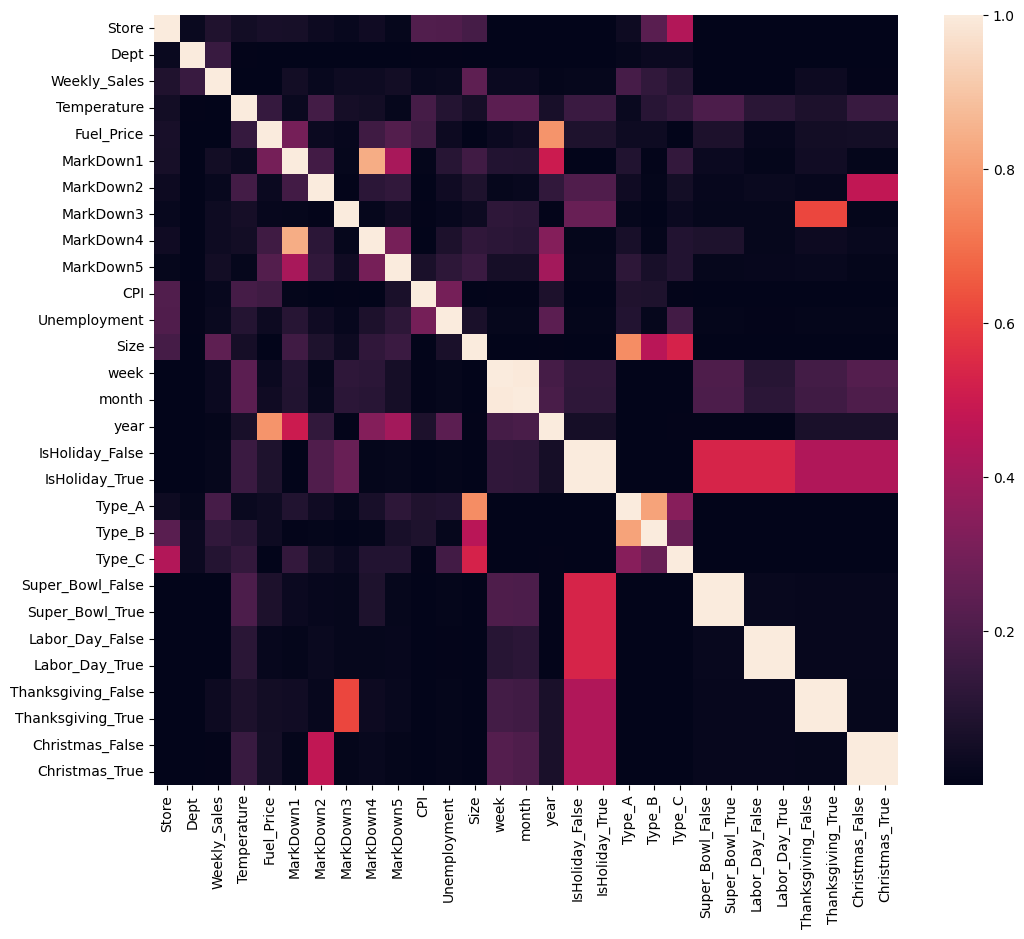

In [11]:
plt.figure(figsize = (12,10))
sns.heatmap(concat_data.corr().abs())   
plt.show()

In [12]:
concat_data_drop1 = concat_data.copy()

In [13]:
drop_col1 = ['Super_Bowl_True','Super_Bowl_False','Labor_Day_True','Labor_Day_False', 'Thanksgiving_True','Thanksgiving_False', 'Christmas_True', 'Christmas_False']
concat_data_drop1.drop(drop_col1, axis=1, inplace=True)

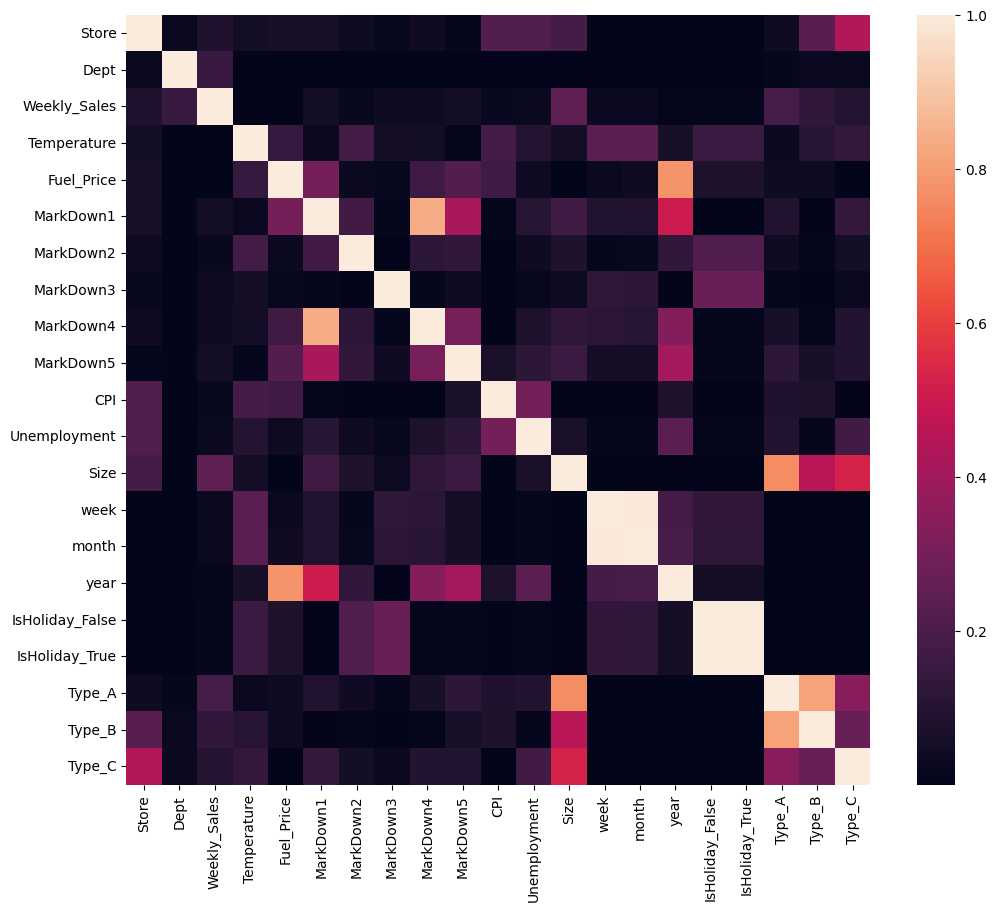

In [14]:
plt.figure(figsize = (12,10))
sns.heatmap(concat_data_drop1.corr().abs())   
plt.show()

In [15]:
concat_data_drop2 = concat_data_drop1.copy()

In [16]:
drop_col2 = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
concat_data_drop2.drop(drop_col2, axis=1, inplace=True) 

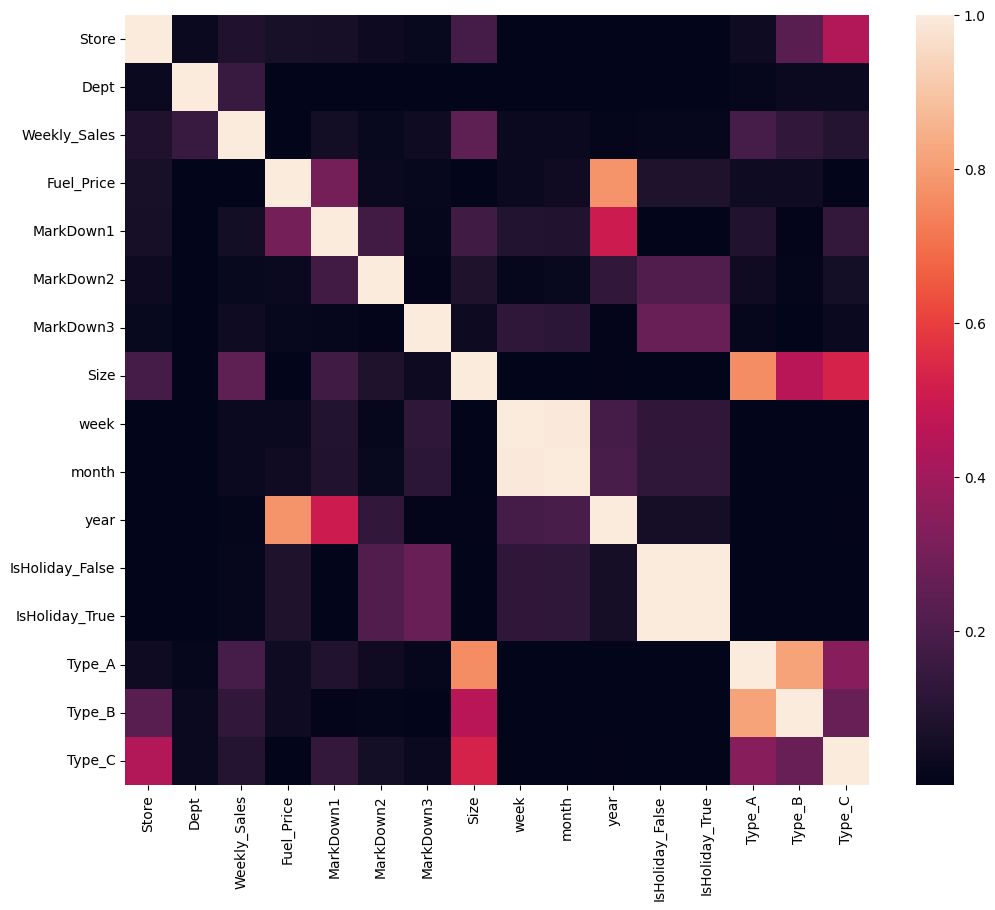

In [17]:
plt.figure(figsize = (12,10))
sns.heatmap(concat_data_drop2.corr().abs())    
plt.show()

In [18]:
train_data_drop = concat_data_drop2.copy()

In [19]:
drop_sales = ['Weekly_Sales']
train_data_drop.drop(drop_sales, axis=1, inplace=True) 

In [20]:
train_data = concat_data_drop2[:int(0.7*(len(concat_data_drop2)))] # taking train part
test_data = concat_data_drop2[int(0.7*(len(concat_data_drop2))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in concat_data_drop2.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [21]:
X_train = X_train.drop(['Date'], axis=1) 
X_test = X_test.drop(['Date'], axis=1) 

In [115]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#making pipe tp use scaler and regressor together
from sklearn.pipeline import make_pipeline, Pipeline
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

# save the model
with open('../Models/rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [23]:
from sklearn.metrics import r2_score
predictions = y_pred
r2_score(y_train, predictions)

0.8547734741454094

In [24]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely forcasting our sales, not just repeating the values it has seen in the training data


predictions_t = y_pred_test
r2_score(y_test, predictions_t)

0.6924092951810215

In [25]:
from sklearn.metrics import mean_absolute_error


In [26]:
mae = mean_absolute_error(y_test, predictions_t)
print(mae)

7019.8339660029105


In [27]:
X = concat_data_drop2[used_cols]
X = X.drop(['Date'], axis=1)

In [28]:
feature_importance = rf.feature_importances_

In [29]:
feature_names = X.columns

In [30]:
feature_names_list = feature_names.tolist()

In [31]:
df_importance = pd.DataFrame({'feature_names': feature_names_list, 'feature_importance': feature_importance})

In [32]:
df_importance.sort_values(by='feature_importance', ascending=False, inplace=True)

In [33]:
print(df_importance)

      feature_names  feature_importance
1              Dept            0.754196
6              Size            0.080248
0             Store            0.044705
12           Type_A            0.038620
7              week            0.018355
2        Fuel_Price            0.018183
13           Type_B            0.014614
8             month            0.008238
5         MarkDown3            0.007045
3         MarkDown1            0.006006
4         MarkDown2            0.004454
9              year            0.001803
10  IsHoliday_False            0.001290
14           Type_C            0.001250
11   IsHoliday_True            0.000993


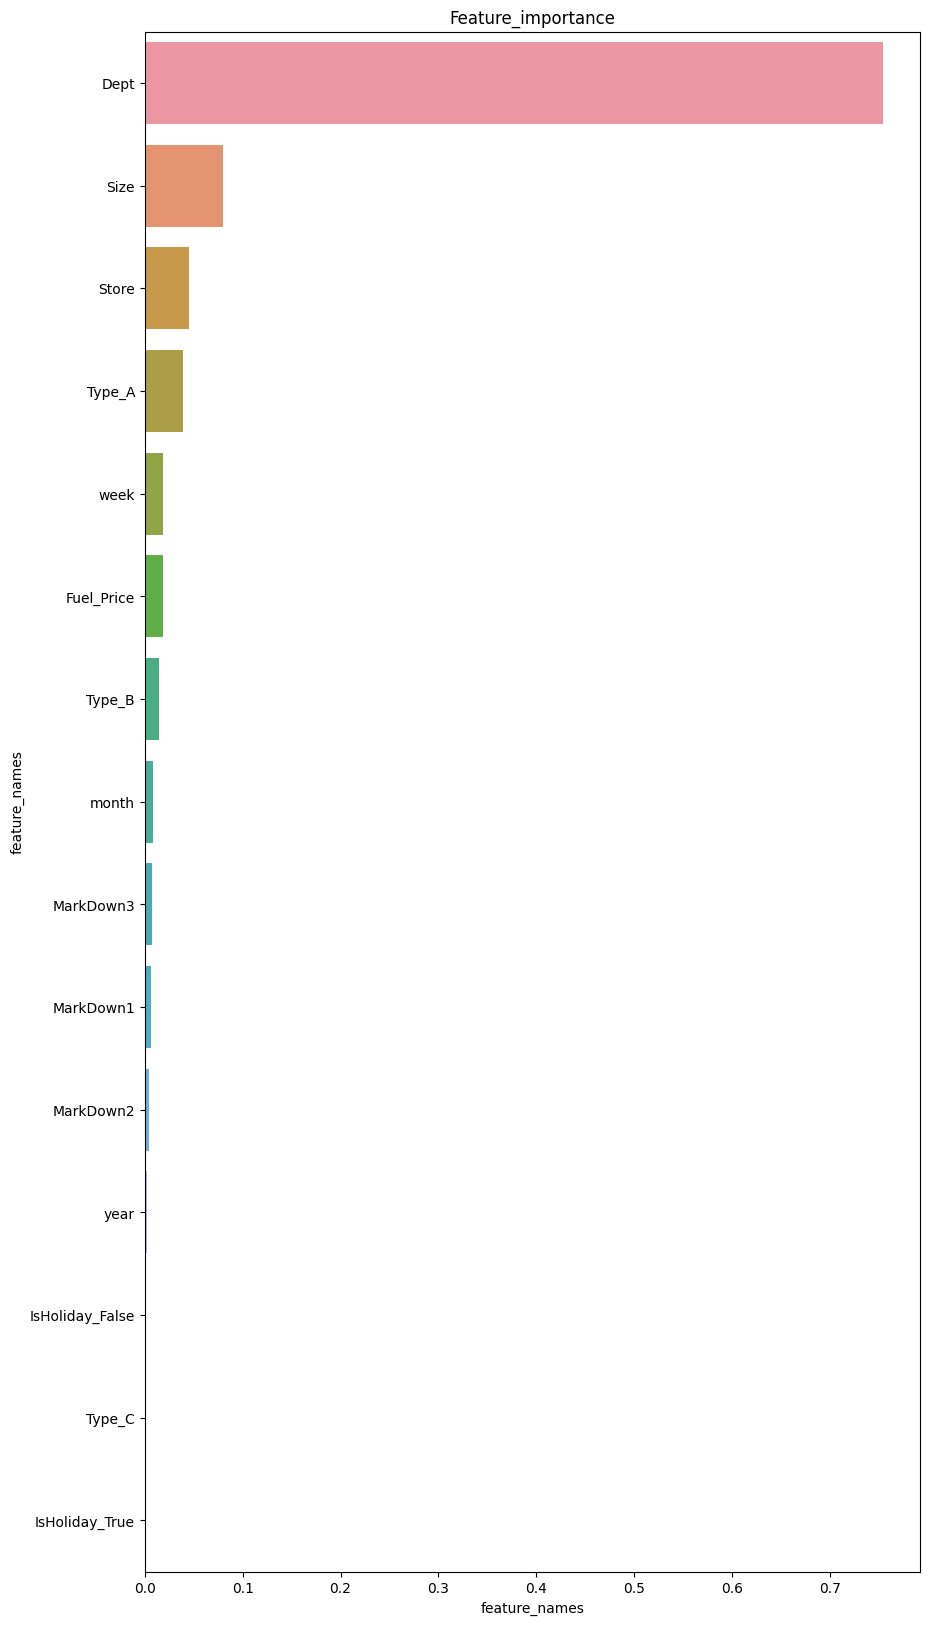

In [34]:
plt.figure(figsize=(10, 20))
sns.barplot(x='feature_importance', y='feature_names', data=df_importance)
plt.title('Feature_importance')
plt.xlabel('feature_names')

plt.show()

In [35]:
X1_train = X_train.drop(['year', 'IsHoliday_False', 'Type_C', 'IsHoliday_True' ], axis=1) # dropping features
X1_test = X_test.drop(['year', 'IsHoliday_False', 'Type_C', 'IsHoliday_True' ], axis=1)

In [118]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)
# save the model
with open('../Models/rf1.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [66]:
predictions = y_pred
r2_score(y_train, predictions)

0.910524390926524

In [38]:
predictions_t = y_pred_test
r2_score(y_test, predictions_t)

0.7329473660181269

In [39]:
mae = mean_absolute_error(y_test, predictions_t)
print(mae)

6276.698038674278


In [40]:
train_data_enc = concat_data[:int(0.7*(len(concat_data)))] # taking train part
test_data_enc = concat_data[int(0.7*(len(concat_data))):] # taking test part

target1 = "Weekly_Sales"
used_cols1 = [c for c in concat_data.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target1]
y_test_enc = test_data_enc[target1]

In [41]:
X_train_enc = X_train_enc.drop(['Date'], axis=1)
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [119]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

# save the model
with open('../Models/rf2.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [43]:
predictions = y_pred_enc
r2_score(y_train_enc, predictions)

0.8150079761810789

In [44]:
predictions_t = y_pred_test_enc 
r2_score(y_test_enc, predictions_t)

0.6212592521261509

In [45]:
mae = mean_absolute_error(y_test_enc, predictions_t)
print(mae)

8136.8310867716355


In [54]:
X_enc = concat_data[used_cols1]
X_enc =X_enc.drop(['Date'], axis=1)

In [55]:
feature_importance = rf.feature_importances_

In [56]:
feature_names = X_enc.columns

In [57]:
feature_names_list = feature_names.tolist()

In [58]:
df_importance = pd.DataFrame({'feature_names1': feature_names_list, 'feature_importance1': feature_importance})

In [60]:
df_importance.sort_values(by='feature_importance1', ascending=False, inplace=True)

In [110]:
feature_names_list

['Store',
 'Dept',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size',
 'week',
 'month',
 'year',
 'IsHoliday_False',
 'IsHoliday_True',
 'Type_A',
 'Type_B',
 'Type_C',
 'Super_Bowl_False',
 'Super_Bowl_True',
 'Labor_Day_False',
 'Labor_Day_True',
 'Thanksgiving_False',
 'Thanksgiving_True',
 'Christmas_False',
 'Christmas_True']

In [61]:
print(df_importance)

        feature_names1  feature_importance1
1                 Dept             0.750423
11                Size             0.050477
17              Type_A             0.035819
0                Store             0.030244
9                  CPI             0.029042
18              Type_B             0.025487
10        Unemployment             0.016398
2          Temperature             0.011571
12                week             0.011423
3           Fuel_Price             0.009975
13               month             0.005224
6            MarkDown3             0.004343
8            MarkDown5             0.003553
7            MarkDown4             0.003306
4            MarkDown1             0.003055
5            MarkDown2             0.002413
19              Type_C             0.001798
14                year             0.001040
24  Thanksgiving_False             0.000968
25   Thanksgiving_True             0.000713
15     IsHoliday_False             0.000669
16      IsHoliday_True          

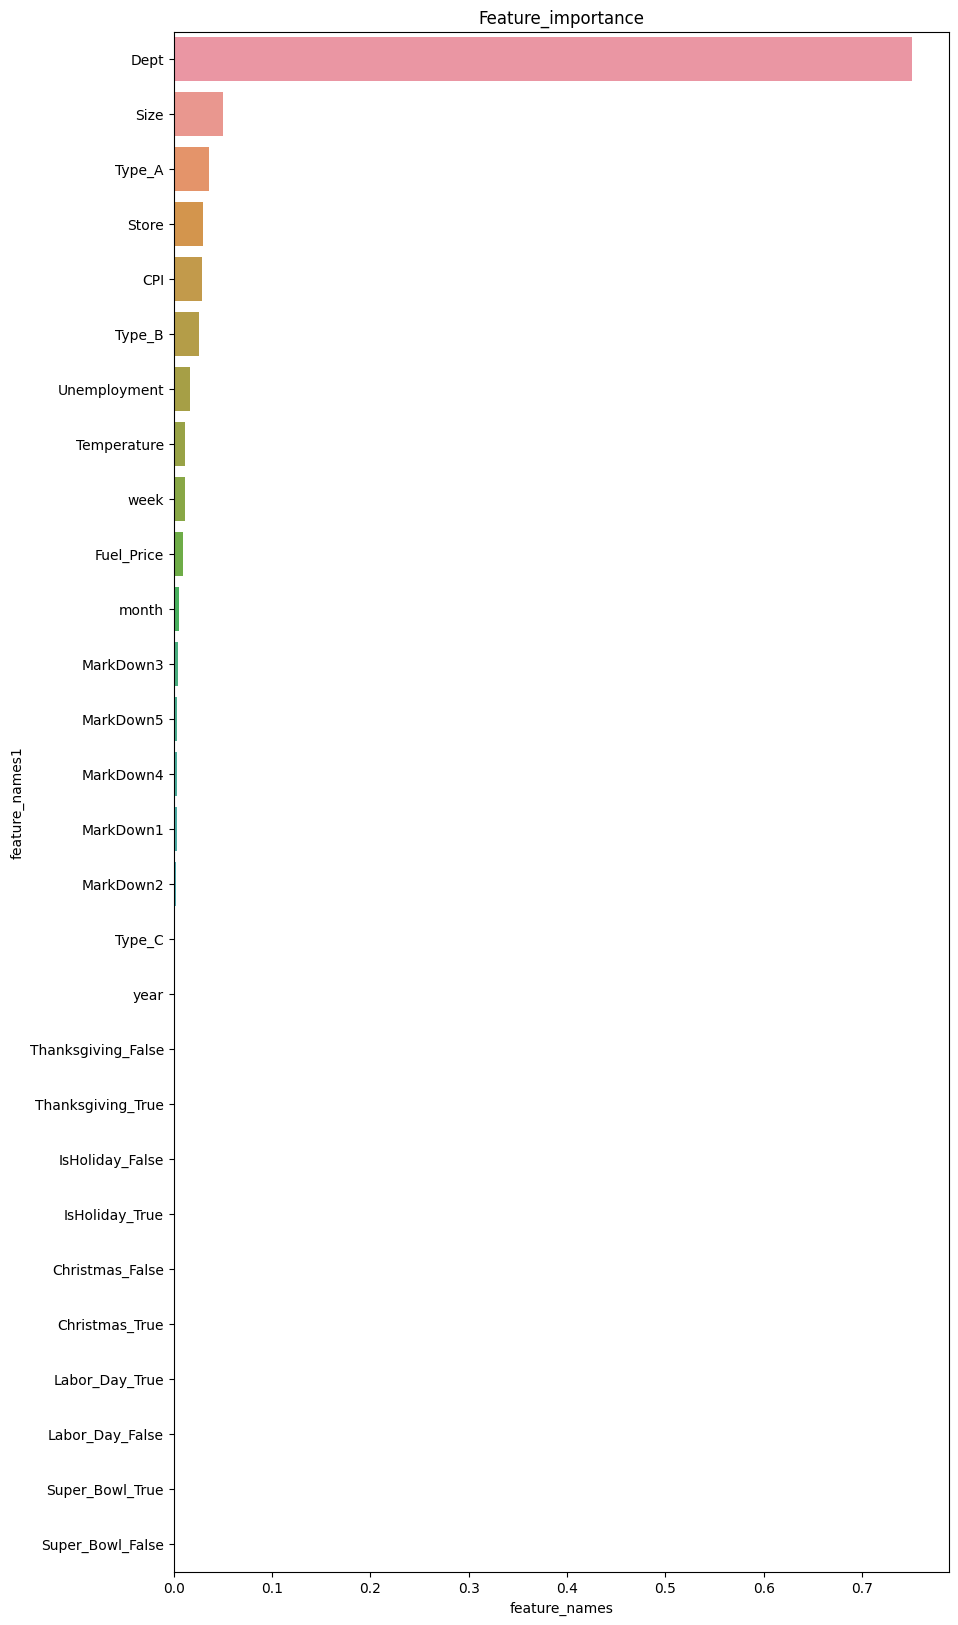

In [63]:
plt.figure(figsize=(10, 20))
sns.barplot(x='feature_importance1', y='feature_names1', data=df_importance)
plt.title('Feature_importance')
plt.xlabel('feature_names')

plt.show()

In [105]:
df_results = pd.DataFrame(columns=["Model", "Info", 'MAE'])

In [106]:
df_results = df_results.append({     
     "Model":'Random Forest Regressor',
      "Info":'without devided holiday & selected features', 
          'MAE':7020}, ignore_index=True)
df_results = df_results.append({     
     "Model":'Random Forest Regressor',
      "Info":'whole data with importance feature selection', 
           'MAE':6277}, ignore_index=True)
df_results = df_results.append({     
     "Model":'Random Forest Regressor',
      "Info":'whole data', 
             'MAE':8137}, ignore_index=True)

In [107]:
df_results

,Model,Info,MAE
0,Random Forest Regressor,without devided holiday & selected features,7020
1,Random Forest Regressor,whole data with importance feature selection,6277
2,Random Forest Regressor,whole data,8137
